In [ ]:
import warnings
warnings.filterwarnings('ignore')
!pip install text2emotion
from collections import Counter

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
cmap = sns.cm.mako_r

%matplotlib inline
import nltk
nltk.downloader.download('words')
nltk.downloader.download('punkt')
nltk.downloader.download('vader_lexicon')
import re
from nltk import word_tokenize, corpus
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer

import text2emotion as te
from tqdm import tqdm_notebook as tqdm

english_words = set(corpus.words.words())



[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
reddit = pd.read_csv('reddit_wsb.csv')
reddit.drop(columns=['id', 'url', 'created'], inplace=True)

In [ ]:
reddit.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56


In [ ]:
reddit.describe()

,score,comms_num
count,44270.000000,44270.000000
mean,1432.178721,223.759499
std,8440.344383,2544.826374
min,0.000000,0.000000
25%,1.000000,2.000000
50%,28.000000,13.000000
75%,180.000000,48.000000
max,348241.000000,93268.000000


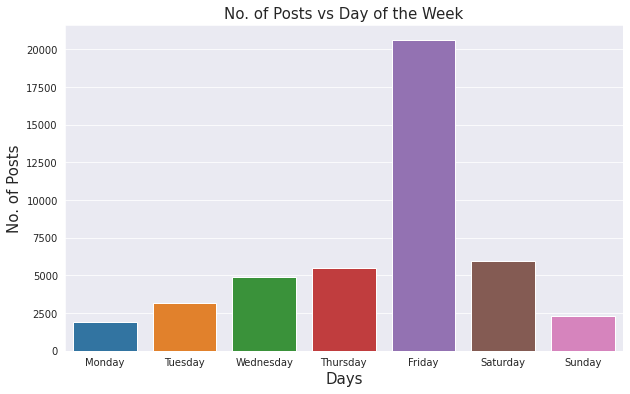

In [ ]:
reddit['timestamp'] = pd.to_datetime(reddit['timestamp'])

day_of_the_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
days_order = list(day_of_the_week.values())

reddit['Weekday'] = reddit['timestamp'].apply(lambda x : day_of_the_week[x.weekday()])

xs = reddit['Weekday'].value_counts().index
ys = reddit['Weekday'].value_counts().values

plt.figure(figsize=(10,6))

sns.barplot(x=xs, y=ys, order=days_order)

plt.title("No. of Posts vs Day of the Week", fontsize=15)

plt.xlabel("Days", fontsize=15)
plt.ylabel("No. of Posts", fontsize=15)

plt.show()

In [ ]:
reddit_title = reddit['title'].dropna()
reddit_body = reddit['body'].dropna()


def clean_text_date(text):
    text = text.lower()

    # Replacing Handlers with Empty String
    text = re.sub('@[^\s]+','',text)

    # Replacing URLs with Empty String
    text = re.sub(r"http\S+", "",text)

    # Remove all the special characters
    text = ' '.join(re.findall(r'\w+', text))

    # Replacing Single Characters with Empty String
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Removing Extra Spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text

    
# Text Preprocessing
reddit_title = reddit_title.apply(lambda x : clean_text_date(x))
reddit_body = reddit_body.apply(lambda x : clean_text_date(x))

reddit_title.head()

0      it not about the money it about sending message
1    math professor scott steiner says the numbers ...
2                                      exit the system
3    new sec filing for gme can someone less retard...
4    not to distract from gme just thought our amc ...
Name: title, dtype: object

In [ ]:
# Split and export data for models
reddit['Date_Divide'] = pd.to_datetime(reddit['timestamp'])
reddit = reddit.set_index(reddit['Date_Divide'])
reddit = reddit.sort_index()

day1 = reddit['2021-01-28']
print('day1 Dataset:',day1.shape)
day1.to_csv(r'day1.csv', index=False,columns=['title'])
day2 = reddit['2021-01-29']
print('day2 Dataset:',day2.shape)
day2.to_csv(r'day2.csv', index=False,columns=['title'])
day3 = reddit['2021-01-30']
print('day3 Dataset:',day3.shape)
day3.to_csv(r'day3.csv', index=False,columns=['title'])
day4 = reddit['2021-01-31']
print('day4 Dataset:',day4.shape)
day4.to_csv(r'day4.csv', index=False,columns=['title'])
day5 = reddit['2021-02-01']
print('day5 Dataset:',day5.shape)
day5.to_csv(r'day5.csv', index=False,columns=['title'])
day6 = reddit['2021-02-02']
print('day6 Dataset:',day6.shape)
day6.to_csv(r'day6.csv', index=False,columns=['title'])
day7 = reddit['2021-02-03']
print('day7 Dataset:',day7.shape)
day7.to_csv(r'day7.csv', index=False,columns=['title'])
day8 = reddit['2021-02-04']
print('day8 Dataset:',day8.shape)
day8.to_csv(r'day8.csv', index=False,columns=['title'])
day9 = reddit['2021-02-05']
print('day8 Dataset:',day9.shape)
day9.to_csv(r'day9.csv', index=False,columns=['title'])
day10 = reddit['2021-02-06']
print('day10 Dataset:',day10.shape)
day10.to_csv(r'day10.csv', index=False,columns=['title'])
day11 = reddit['2021-02-07']
print('day11 Dataset:',day11.shape)
day11.to_csv(r'day11.csv', index=False,columns=['title'])
day12 = reddit['2021-02-08']
print('day12 Dataset:',day12.shape)
day12.to_csv(r'day12.csv', index=False,columns=['title'])




day1 Dataset: (1197, 7)
day2 Dataset: (15694, 7)
day3 Dataset: (1424, 7)
day4 Dataset: (939, 7)
day5 Dataset: (884, 7)
day6 Dataset: (1502, 7)
day7 Dataset: (2643, 7)
day8 Dataset: (1671, 7)
day8 Dataset: (2598, 7)
day10 Dataset: (2791, 7)
day11 Dataset: (511, 7)
day12 Dataset: (287, 7)


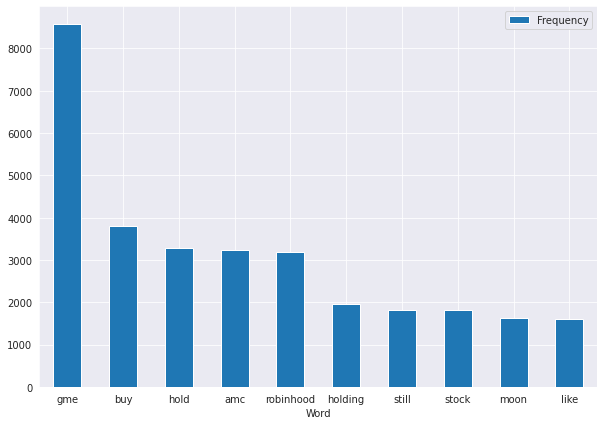

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
top_N = 10
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (
    reddit_title.str.lower()
    .replace([r"\|", RE_stopwords], [" ", ""], regex=True)
    .str.cat(sep=" ")
    .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
# print(rslt)
# plot
rslt.plot.bar(rot=0, figsize=(10,7), width=0.5)

In [ ]:
emotions = []

tqdm().pandas()
for text in tqdm(reddit_title):
    emotions.append(te.get_emotion(str(text)))

In [ ]:
emotion_data = pd.DataFrame.from_dict(emotions)

reddit['happy'] = emotion_data.Happy
reddit['angry'] = emotion_data.Angry
reddit['surprise'] = emotion_data.Surprise
reddit['sad'] = emotion_data.Sad
reddit['fear'] = emotion_data.Fear

In [ ]:
for i in range(0,len(emotion_data.columns)):
    reddit[emotion_data.columns[i]] = emotion_data[emotion_data.columns[i]]

In [ ]:
reddit.head()

,title,score,comms_num,body,timestamp,Weekday,happy,angry,surprise,sad,fear,Happy,Angry,Surprise,Sad,Fear
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,Thursday,0.0,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,1.00
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,Thursday,0.0,0.25,0.25,0.25,0.25,0.0,0.25,0.25,0.25,0.25
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,Thursday,0.0,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,1.00
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57,Thursday,0.0,0.00,0.00,1.00,0.00,0.0,0.00,0.00,1.00,0.00
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56,Thursday,0.0,0.00,0.50,0.50,0.00,0.0,0.00,0.50,0.50,0.00


In [ ]:
reddit["date"] = pd.to_datetime(reddit.timestamp).dt.date
reddit["hour"] = pd.to_datetime(reddit.timestamp).dt.hour
reddit["post_count"] = 1
agg_day = reddit.groupby("date").mean()
agg_hour = reddit.groupby(["date", "hour"]).mean()

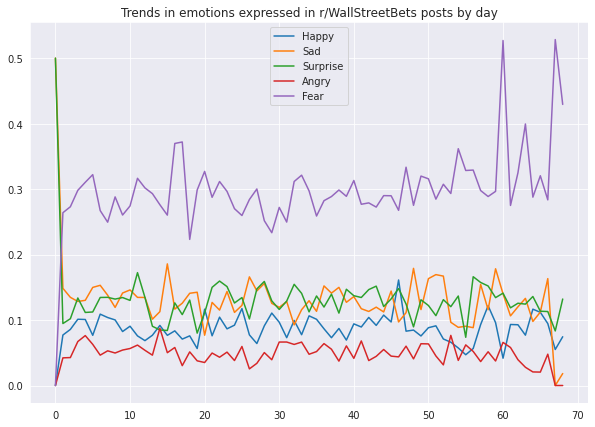

In [ ]:

fig = agg_day.reset_index().plot(y = ['Happy','Sad','Surprise','Angry','Fear'],title="Trends in emotions expressed in r/WallStreetBets posts by day",figsize=(10,7))
fig

In [ ]:
!pip install tiingo

In [ ]:
from tiingo import TiingoClient
config = {}
config['session'] = True
config['api_key'] = "97efecd3df196b1717fb44bb60fcbe5882d4669f"
client = TiingoClient(config)

In [ ]:
ticker_metadata = client.get_ticker_metadata("GME")
ticker_price = client.get_ticker_price("GME", frequency="daily")
historical_prices = client.get_dataframe("GME", fmt='csv', startDate='2021-01-28', endDate='2021-02-08', frequency='daily')
tickers = client.list_stock_tickers()

In [ ]:
historical_prices = historical_prices.reset_index()
historical_prices["date"] = pd.to_datetime(historical_prices.date).dt.date
historical_prices

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2021-01-28,193.60,483.0000,112.2500,265.00,58815805,193.60,483.0000,112.2500,265.00,58815805,0.0,1.0
1,2021-01-29,325.00,413.9800,250.0000,379.71,49414294,325.00,413.9800,250.0000,379.71,49414294,0.0,1.0
2,2021-02-01,225.00,322.0000,212.0000,316.56,37382152,225.00,322.0000,212.0000,316.56,37382152,0.0,1.0
3,2021-02-02,90.00,158.0000,74.2201,140.76,76663691,90.00,158.0000,74.2201,140.76,76663691,0.0,1.0
4,2021-02-03,92.41,113.3999,85.2500,112.01,42698511,92.41,113.3999,85.2500,112.01,42698511,0.0,1.0
5,2021-02-04,53.50,91.5000,53.3300,91.19,62427275,53.50,91.5000,53.3300,91.19,62427275,0.0,1.0
6,2021-02-05,63.77,95.0000,51.0900,54.04,81345013,63.77,95.0000,51.0900,54.04,81345013,0.0,1.0
7,2021-02-08,60.00,72.6600,58.0200,72.41,25687282,60.00,72.6600,58.0200,72.41,25687282,0.0,1.0


In [ ]:
rednas_data = pd.merge(reddit, historical_prices, on='date', how='right')
rednas_data

,title,score,comms_num,body,timestamp,Weekday,happy,angry,surprise,sad,fear,Happy,Angry,Surprise,Sad,Fear,date,hour,post_count,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,Thursday,0.0,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,1.00,2021-01-28,21,1,193.6,483.00,112.25,265.00,58815805,193.6,483.00,112.25,265.00,58815805,0.0,1.0
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,Thursday,0.0,0.25,0.25,0.25,0.25,0.0,0.25,0.25,0.25,0.25,2021-01-28,21,1,193.6,483.00,112.25,265.00,58815805,193.6,483.00,112.25,265.00,58815805,0.0,1.0
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,Thursday,0.0,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,1.00,2021-01-28,21,1,193.6,483.00,112.25,265.00,58815805,193.6,483.00,112.25,265.00,58815805,0.0,1.0
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57,Thursday,0.0,0.00,0.00,1.00,0.00,0.0,0.00,0.00,1.00,0.00,2021-01-28,21,1,193.6,483.00,112.25,265.00,58815805,193.6,483.00,112.25,265.00,58815805,0.0,1.0
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56,Thursday,0.0,0.00,0.50,0.50,0.00,0.0,0.00,0.50,0.50,0.00,2021-01-28,21,1,193.6,483.00,112.25,265.00,58815805,193.6,483.00,112.25,265.00,58815805,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26471,The Chinese New Year,22,22,I’ve seen both views online about what may hap...,2021-02-08 10:45:05,Monday,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2021-02-08,10,1,60.0,72.66,58.02,72.41,25687282,60.0,72.66,58.02,72.41,25687282,0.0,1.0
26472,GME gain porn - 5.8k to 75k,298,59,NaN,2021-02-08 10:37:53,Monday,0.0,0.00,1.00,0.00,0.00,0.0,0.00,1.00,0.00,0.00,2021-02-08,10,1,60.0,72.66,58.02,72.41,25687282,60.0,72.66,58.02,72.41,25687282,0.0,1.0
26473,"My fellow 🚀nauts, Why $ZOM =🚀 🚀 - A simplistic DD",465,198,"if you love money, pls read & don't delete\n\n...",2021-02-08 10:33:54,Monday,0.0,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,1.00,2021-02-08,10,1,60.0,72.66,58.02,72.41,25687282,60.0,72.66,58.02,72.41,25687282,0.0,1.0
26474,$API (Agora) - No need to draw trend lines or ...,23,28,NaN,2021-02-08 10:32:40,Monday,0.0,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,1.00,2021-02-08,10,1,60.0,72.66,58.02,72.41,25687282,60.0,72.66,58.02,72.41,25687282,0.0,1.0


In [ ]:
rednas_date = rednas_data.groupby("date").aggregate({"Happy": "mean", "Angry": "mean", "Surprise": "mean", "Sad": "mean", "Fear": "mean", "score": "mean", "comms_num": "mean", "post_count": "sum", "adjClose": "mean", "adjOpen": "mean"})
rednas_date

,Happy,Angry,Surprise,Sad,Fear,score,comms_num,post_count,adjClose,adjOpen
date,,,,,,,,,,
2021-01-28,0.077076,0.042231,0.094620,0.148438,0.263901,960.609023,142.193818,1197,193.60,265.00
2021-01-29,0.085674,0.042661,0.101985,0.134672,0.273006,408.457309,52.371288,15694,325.00,379.71
2021-02-01,0.076640,0.062817,0.112285,0.149819,0.322059,4230.302036,531.211538,884,225.00,316.56
2021-02-02,0.108988,0.046358,0.134467,0.153036,0.267157,786.005326,101.698402,1502,90.00,140.76
2021-02-03,0.103833,0.052970,0.134673,0.137911,0.249448,983.322361,128.741203,2643,92.41,112.01
2021-02-04,0.100150,0.049629,0.131987,0.119264,0.288055,955.487732,78.284859,1671,53.50,91.19
2021-02-05,0.082417,0.054142,0.134342,0.141251,0.260370,200.257121,27.436105,2598,63.77,54.04
2021-02-08,0.068537,0.053763,0.134495,0.134495,0.301777,3190.282230,475.045296,287,60.00,72.41


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

trace1 = go.Scatter(
    y=rednas_date['adjClose'],
    x=rednas_date.reset_index().date,
    name='Closing Price',
    line=dict(color='red', width=4),

)
trace2 = go.Scatter(
    y=rednas_date["Happy"],
    x=rednas_date.reset_index().date,
    name='Happiness',
    yaxis='y2'

)
trace3 = go.Scatter(
    y=rednas_date["Angry"],
    x=rednas_date.reset_index().date,
    name='Anger',
    yaxis='y2'

)
trace4 = go.Scatter(
    y=rednas_date["Surprise"],
    x=rednas_date.reset_index().date,
    name='Surprise',
    yaxis='y2'

)
trace5 = go.Scatter(
    y=rednas_date["Fear"],
    x=rednas_date.reset_index().date,
    name='Fear',
    yaxis='y2'

)
trace6 = go.Scatter(
    y=rednas_date["Sad"],
    x=rednas_date.reset_index().date,
    name='Sadness',
    yaxis='y2'

)


fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig.add_trace(trace5,secondary_y=True)
fig.add_trace(trace6,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'Emotions and Closing Price plotted with respect to the date',xaxis=dict(
      tickangle=0
    ))
fig.show()

In [ ]:
rednas_date["delta"] = rednas_date['adjOpen']-rednas_date["adjClose"]

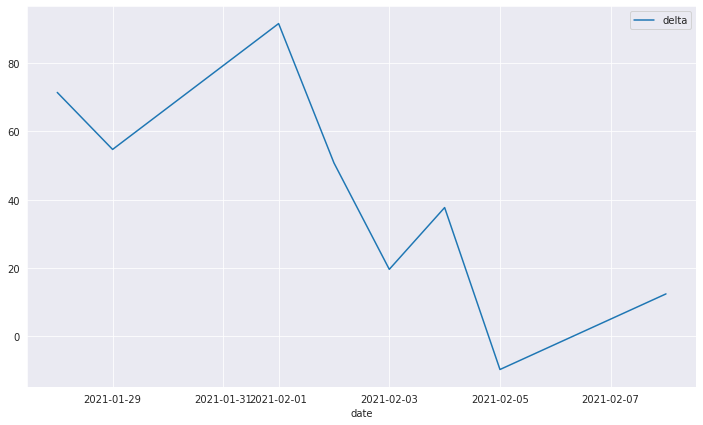

In [ ]:
rednas_date.reset_index().plot(x='date',y='delta',figsize=(12,7))

In [ ]:
trace2 = go.Scatter(
    y=rednas_date['comms_num'],
    x=rednas_date.reset_index().date,
    name='Number of comments'

)
trace1 = go.Scatter(
    y=rednas_date["delta"],
    x=rednas_date.reset_index().date,
    name='Difference between opening to closing prices',
    yaxis='y2'

)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'Sentiments and Opening Price plotted with respect to the date',xaxis=dict(
      tickangle=0
    ))
fig.show()